In [1]:
import matplotlib.pyplot as plt
from numpy import *
import h5py
from multilayer_response import multilayer_response

/home/guillem/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def read_flux(fname):
    data = genfromtxt(fname, delimiter=",", dtype='str');
    data = data[:,1:]
    data = char.replace(data, 'i', 'j').astype(float64);

    freq = data[:, 0]
    flux_reflection = data[:, 1]
    flux_transmission = data[:, 2]
    
    return (freq, flux_reflection, flux_transmission)

In [3]:
(freq, flux_reflected, flux_transmitted) = read_flux('structure_power')
(freq, flux_reference, _) = read_flux('reference_power')

In [5]:
# Transfer Matrix Theory
n1_dbr = 3.
n2_dbr = 2.
n_pairs = 20
index_layers = tile([n1_dbr, n2_dbr], n_pairs)
t_layers = tile([0.25/n1_dbr, 0.25/n2_dbr], n_pairs)

(theory_reflection, theory_transmission) = multilayer_response(t_layers,
                                                               index_layers,
                                                               1, 1,
                                                               freq)

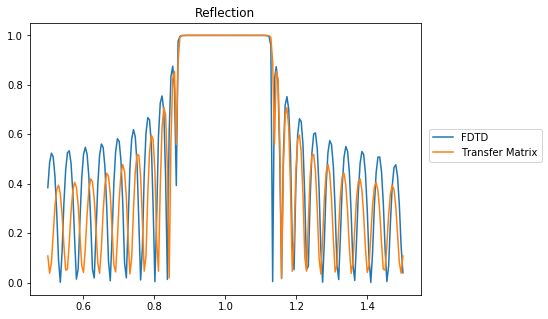

In [6]:
normalized_reflection = -flux_reflected/flux_reference

plt.figure(figsize=(7,5))
plt.title('Reflection')
plt.plot(freq, normalized_reflection, label='FDTD')
plt.plot(freq, theory_reflection, label='Transfer Matrix')
plt.legend(bbox_to_anchor=(1.15, 0.6),
           bbox_transform=plt.gcf().transFigure)
plt.show()

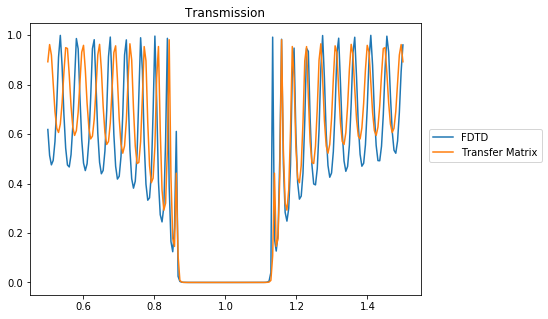

In [7]:
normalized_transmission = flux_transmitted/flux_reference

plt.figure(figsize=(7,5))
plt.title('Transmission')
plt.plot(freq, normalized_transmission, label='FDTD')
plt.plot(freq, theory_transmission, label='Transfer Matrix')
plt.legend(bbox_to_anchor=(1.15, 0.6),
           bbox_transform=plt.gcf().transFigure)
plt.show()